In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## Recopilación de datos

In [52]:
data =  pd.read_csv('/workspaces/Gupir11-machine-learning/data/raw/internal-link (1).csv')
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Procesamiento de datos

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [54]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## Seleccion de columnas

In [55]:
cols = ['Latitude', 'Longitude', 'MedInc']
X = data[cols]



## Escalado

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split X

In [57]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo Kmeans

In [58]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

,n_clusters,6
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


## Añadimos Cluster

In [59]:
df_train = X_train.copy()
df_train["cluster"] = kmeans.labels_

## Graficamos

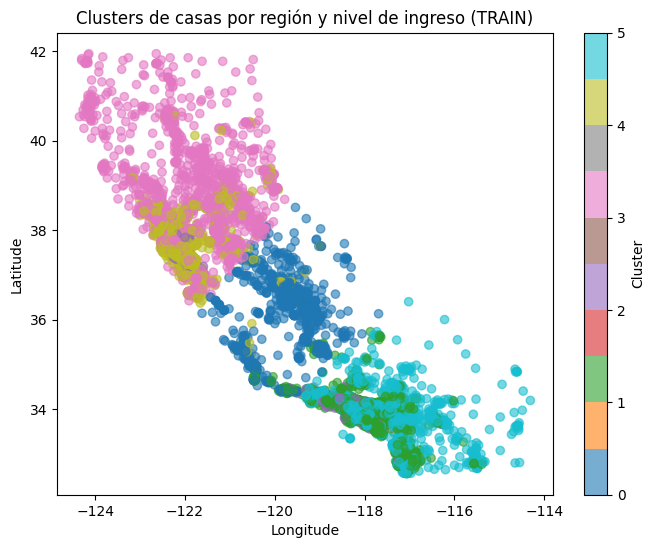

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_train["Longitude"],
    df_train["Latitude"],
    c=df_train["cluster"],
    cmap="tab10",
    alpha=0.6
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de casas por región y nivel de ingreso (TRAIN)")
plt.colorbar(label="Cluster")
plt.show()

In [61]:
df_test = X_test.copy()
df_test["cluster"] = kmeans.predict(X_test_scaled)

### Grafica de Predicion 

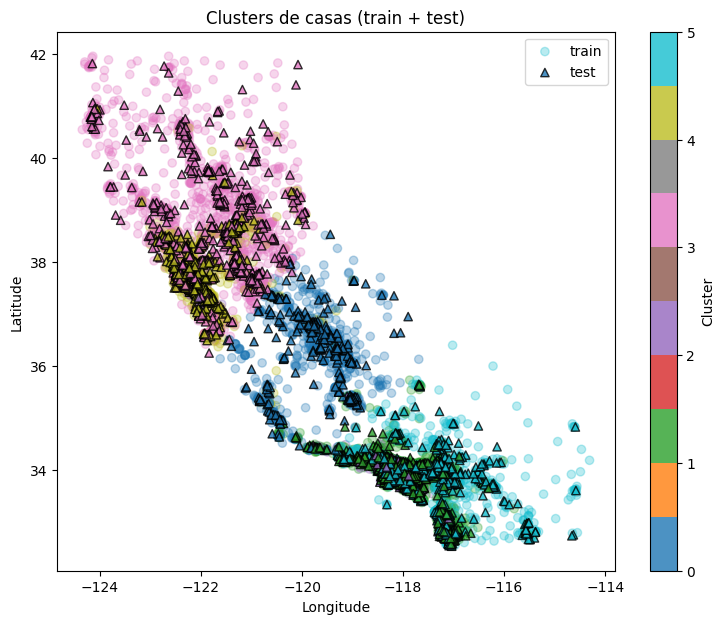

In [62]:
plt.figure(figsize=(9,7))

plt.scatter(
    df_train["Longitude"], df_train["Latitude"],
    c=df_train["cluster"],
    cmap="tab10",
    alpha=0.3,
    label="train"
)

plt.scatter(
    df_test["Longitude"], df_test["Latitude"],
    c=df_test["cluster"],
    cmap="tab10",
    marker="^",
    edgecolor="black",
    alpha=0.8,
    label="test"
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clusters de casas (train + test)")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()

### Observacion 
Los puntos del test no aparecen dispersos ni fuera de las zonas definidas, por lo que la predicción puede considerarse satisfactoria.

## Split con Y

In [63]:
y_train = df_train["cluster"]
y_test = df_test["cluster"]

## Modelado con Random Forest

In [64]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
y_pred = clf.predict(X_test_scaled)

accuracy_score(y_test, y_pred)


0.9956395348837209

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       337
           1       1.00      1.00      1.00       829
           2       1.00      0.98      0.99       112
           3       0.99      0.99      0.99       962
           4       0.99      1.00      0.99       514
           5       1.00      1.00      1.00      1374

    accuracy                           1.00      4128
   macro avg       1.00      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



El modelo supervisado (Random Forest) logra una accuracy de aproximadamente 99%.
Los clusters generados por K-Means son lo suficientemente consistentes como para ser aprendidos por un clasificador.